In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [3]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [4]:
df.columns = ['Customer_ID', 'Gender', 'Age', 'City', 'Membership_Type',
       'Total_Spend', 'Items_Purchased', 'Average_Rating', 'Discount_Applied',
       'Days_Since_Last_Purchase', 'Satisfaction_Level']

In [5]:
df = df.drop(columns=['Customer_ID'])

In [6]:
df.shape

(350, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    object 
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    object 
 3   Membership_Type           350 non-null    object 
 4   Total_Spend               350 non-null    float64
 5   Items_Purchased           350 non-null    int64  
 6   Average_Rating            350 non-null    float64
 7   Discount_Applied          350 non-null    bool   
 8   Days_Since_Last_Purchase  350 non-null    int64  
 9   Satisfaction_Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 25.1+ KB


# PyCaret end-to-end machine learning model

In [ ]:
!pip install pycaret

In [9]:
from pycaret.clustering import *
s = setup(df, normalize = True)

,Description,Value
0,Session id,8998
1,Original data shape,"(350, 10)"
2,Transformed data shape,"(350, 19)"
3,Numeric features,5
4,Categorical features,4
5,Rows with missing values,0.6%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [10]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(df, normalize = True)

,Description,Value
0,Session id,5204
1,Original data shape,"(350, 10)"
2,Transformed data shape,"(350, 19)"
3,Numeric features,5
4,Categorical features,4
5,Rows with missing values,0.6%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [11]:
kmeans = create_model('kmeans')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6210,286.4700,0.8218,0,0,0


In [12]:
kmeans

KMeans(n_clusters=4, random_state=8998)

In [13]:
evaluate_model(kmeans)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

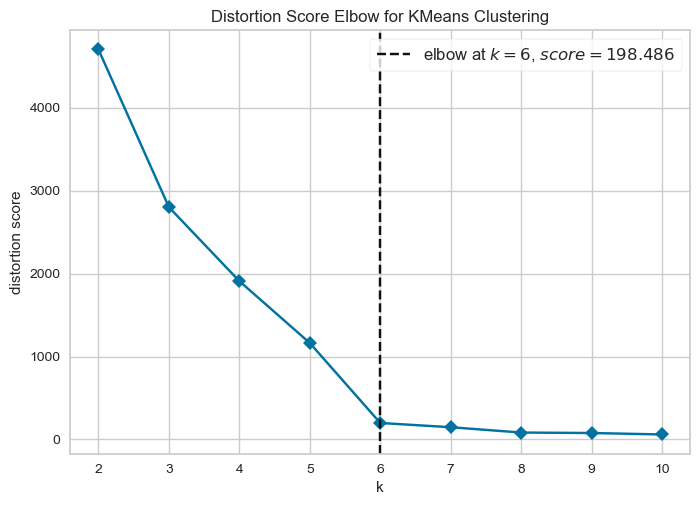

In [14]:
plot_model(kmeans, plot = 'elbow')


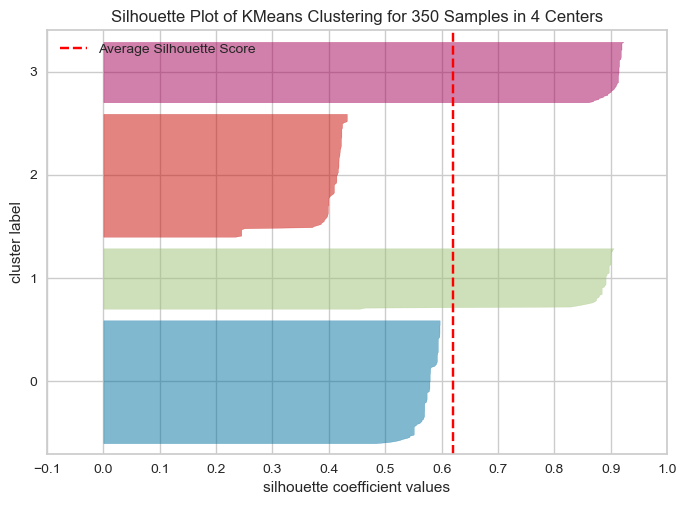

In [15]:
plot_model(kmeans, plot = 'silhouette')


In [16]:

result = assign_model(kmeans)
result.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level,Cluster
0,Female,29,New York,Gold,1120.199951,14,4.6,True,25,Satisfied,Cluster 0
1,Male,34,Los Angeles,Silver,780.500000,11,4.1,False,18,Neutral,Cluster 2
2,Female,43,Chicago,Bronze,510.750000,9,3.4,True,42,Unsatisfied,Cluster 3
3,Male,30,San Francisco,Gold,1480.300049,19,4.7,False,12,Satisfied,Cluster 0
4,Male,27,Miami,Silver,720.400024,13,4.0,True,55,Unsatisfied,Cluster 2


# Clusters Predictions

In [21]:
pd.crosstab(result['Cluster'],result['Gender'])

Gender,Female,Male
Cluster,,
Cluster 0,58,59
Cluster 1,58,0
Cluster 2,1,116
Cluster 3,58,0


In [22]:
pd.crosstab(result['Cluster'],result['Membership_Type'])

Membership_Type,Bronze,Gold,Silver
Cluster,,,
Cluster 0,0,117,0
Cluster 1,58,0,0
Cluster 2,0,0,117
Cluster 3,58,0,0


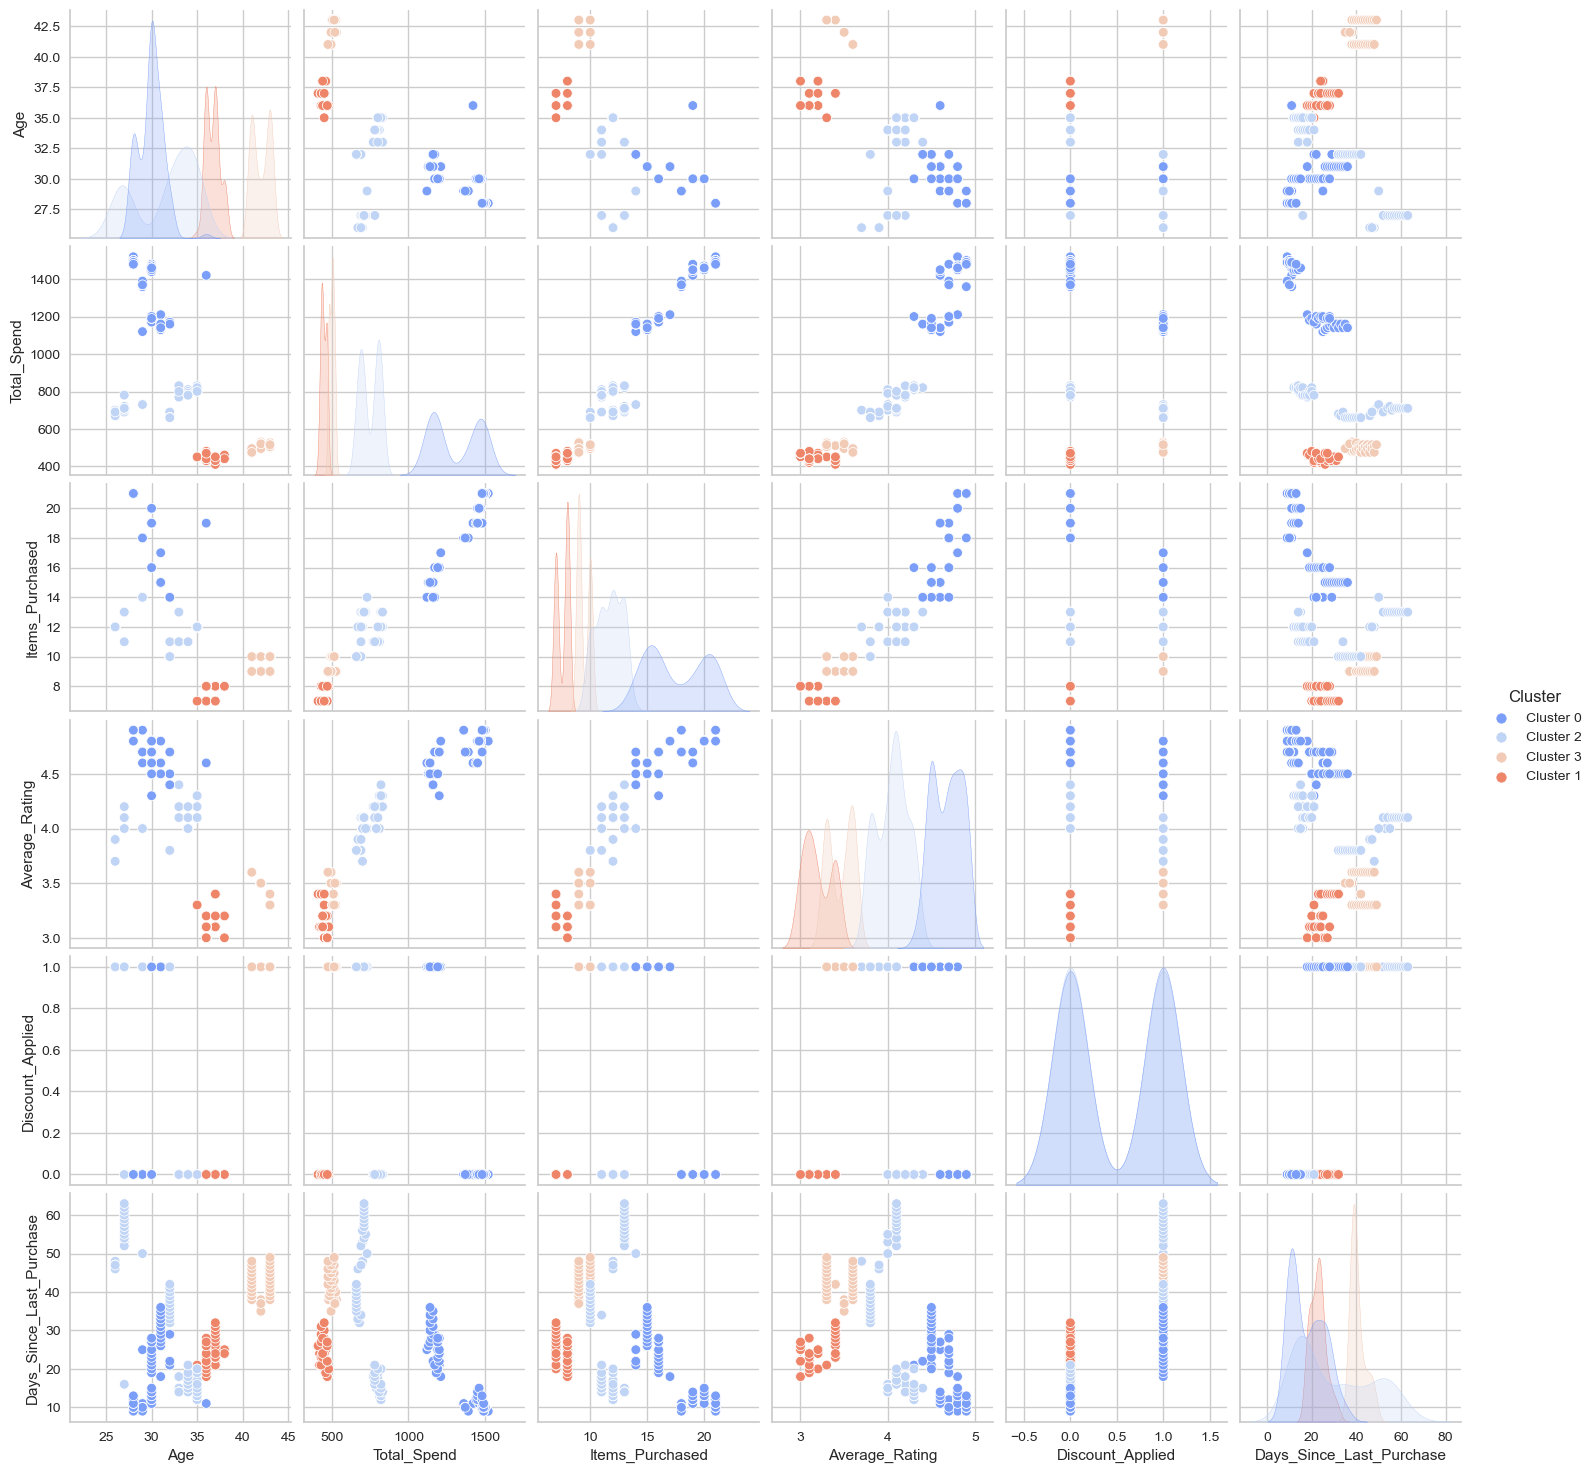

In [23]:
sns.pairplot(result,hue='Cluster',palette='coolwarm') 

<Axes: xlabel='Days_Since_Last_Purchase', ylabel='Total_Spend'>

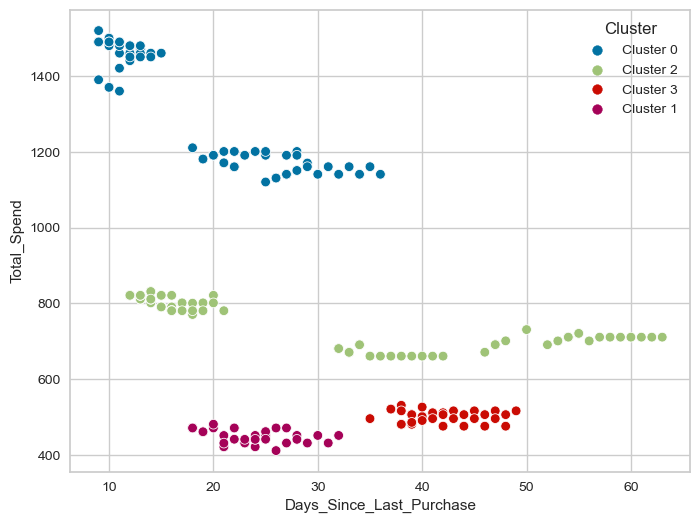

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=result, x='Days_Since_Last_Purchase', y='Total_Spend', hue='Cluster')

<Axes: xlabel='Cluster', ylabel='Days_Since_Last_Purchase'>

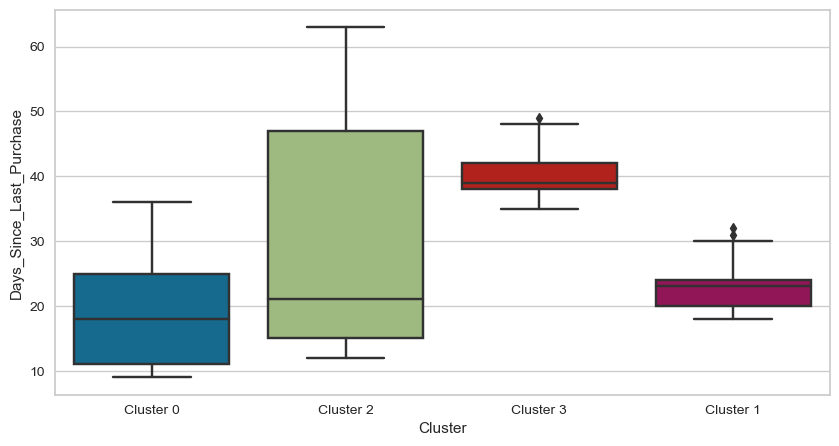

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x ='Cluster', y ='Days_Since_Last_Purchase', data=result)

In [30]:
result

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level,Cluster
0,Female,29,New York,Gold,1120.199951,14,4.6,True,25,Satisfied,Cluster 0
1,Male,34,Los Angeles,Silver,780.500000,11,4.1,False,18,Neutral,Cluster 2
2,Female,43,Chicago,Bronze,510.750000,9,3.4,True,42,Unsatisfied,Cluster 3
3,Male,30,San Francisco,Gold,1480.300049,19,4.7,False,12,Satisfied,Cluster 0
4,Male,27,Miami,Silver,720.400024,13,4.0,True,55,Unsatisfied,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.299988,10,3.8,True,42,Unsatisfied,Cluster 2
346,Female,36,Houston,Bronze,470.500000,8,3.0,False,27,Neutral,Cluster 1
347,Female,30,New York,Gold,1190.800049,16,4.5,True,28,Satisfied,Cluster 0
348,Male,34,Los Angeles,Silver,780.200012,11,4.2,False,21,Neutral,Cluster 2
